# Ejemplo de algoritmo basado en picos de densidad

En este ejemplo mostraremos un sencillo codigo para ilustrar el algoritmo de clustering basado en picos de densidad (Density-Peak Clustering o DPC) y como este puede utilizarse en problemas de análisis cluster.

Para este ejemplo utilizaremos un dataset simulado, para poder ver cómodamente el resultado de la ejecución de este tipo de algoritmos.

## Instalación de un paquete para clustering basado en picos de densidad (DPC)



In [21]:
# Realizamos la instalación del paquete pydpc, el cual usaremos para ejecutar
# el algoritmo DPC. Más información en: https://pypi.org/project/pydpc/
!pip install pydpc

## Generación de datos utilizando simulación
Simulamos dos muestras aleatorias de tamaño $n=20$ de dos normales bivariantes con media $\mu_1=(1,1)$ en un grupo y $\mu_2=(-1,-1)$ en el otro grupo. Notese que la matriz de varianza-covarianza es la identidad. Además de lo anterior, vamos a generar un outlier en la posición (-2, 2) para ver como se comporta el algoritmo frente a él.

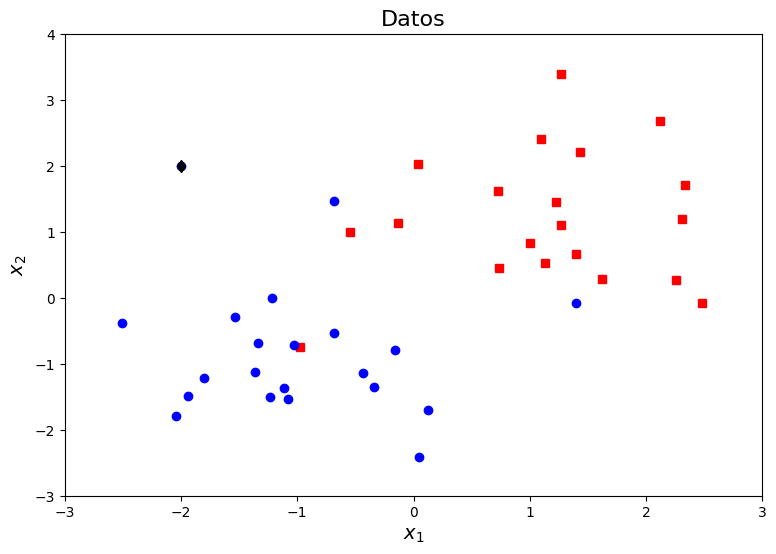

In [23]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(10) # Fijamos la semilla para la reproducibilidad de los resultados
x1 = np.random.standard_normal((20, 2)) + np.ones((20, 2))
x2 = np.random.standard_normal((20, 2)) - np.ones((20, 2))
x3 = np.array([[-2, 2]]) # Añadimos también un outlier en (-2, 2)
X = np.concatenate((x1, x2, x3), axis=0)

# Dibujamos los datos simulados, elejiremos un color para cada muestra
plt.figure(figsize=(9, 6))
plt.plot(X[:20, 0], X[:20, 1], 'rs')
plt.plot(X[20:, 0], X[20:, 1], 'bo')
plt.plot(X[40:, 0], X[40:, 1], 'kd')
plt.title("Datos", fontsize=16)
plt.xlabel(r"$x_1$", fontsize=14)
plt.ylabel(r"$x_2$", fontsize=14)
plt.xlim(-3, 3)
plt.ylim(-3, 4)
plt.show()

## Ejecución del algoritmo DPC

Para ejecutar el algoritmo DPC vamos a hacer uso del paquete previamente instalado.

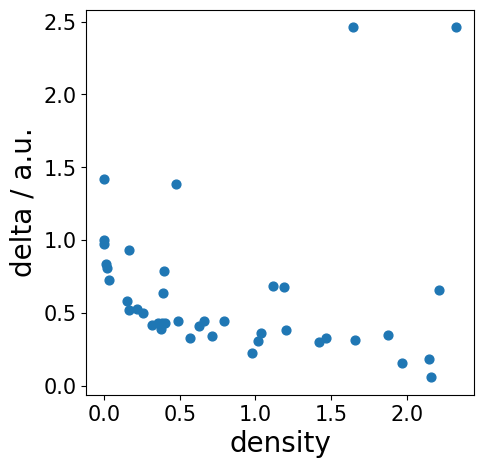

In [24]:
import pydpc

# Primero inicializamos el algoritmo, lo que calcula las densidades y la
# distancia mínima entre puntos. Este método también dibuja el grafo de decisión.
clu = pydpc.Cluster(X)

En el eje $x$ representa la densidad de cada uno de los puntos del dataset ($\rho_i$). Nos interesan aquellos puntos con alta densidad, ya que son aquellos que conforman un grupo de datos. El eje $y$ representa la distancia a la que se encuentra cada dato del sus vecinos más cercanos con mayor densidad ($\delta_i$). Nos interesan aquellos puntos con una distancia mayor. Es decir, nos interesan los puntos situados en la esquina superior derecha.

Definimos ahora los valores de $\rho$ (*rho*) y $\delta$ (*delta*) que nos van a permitir definir una frontera. Los puntos en la parte superior derecha de esta frontera serán elegidos como los centros de los clusters.

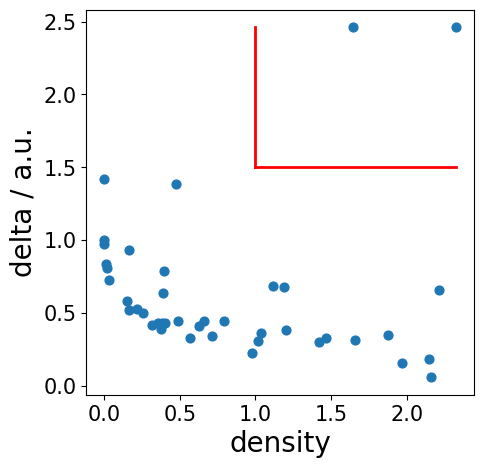

In [25]:
np.bool = bool  # necesario porque np.bool está obsoleto (deprecated)

# Definimos los valores rho y delta que nos permiten elegir los centros
rho = 1
delta = 1.5
clu.assign(rho, delta)

In [26]:
# Obtenemos que datos de X serán los centros de los clusters
cluster_centers = clu.clusters
cluster_centers

array([16, 29], dtype=int32)

In [ ]:
# Mostramos los grupos obtenidos para cada elemento del dataset X
labels = clu.membership
labels

In [ ]:
# Representación gráfica de la solución
# He comentado el código original que es susceptible de mejora
import numpy
#colors = numpy.array([x for x in 'bgrcmykbgrcmykbgrcmykbgrcmyk'])
#colors = numpy.hstack([colors] * 20)
#numbers = numpy.arange(len(X))
colors = 'bgk'
plt.figure(figsize=(9, 6))
for i in range(len(X)):
    if i in cluster_centers: # Centros de los clusters (en negrita)
      pass
      #plt.text(X[i][0], X[i][1], numbers[i], color=colors[labels[i]], weight='bold', fontsize=16)
      plt.text(X[i][0], X[i][1], i, color=colors[labels[i]], weight='bold', fontsize=16)
    else: # Resto de datos
      #plt.text(X[i][0], X[i][1], numbers[i], color=colors[labels[i]])
      plt.text(X[i][0], X[i][1], i, color=colors[labels[i]])
plt.xlabel(r"$x_1$", fontsize=14)
plt.ylabel(r"$x_2$", fontsize=14)
plt.xlim(-3, 3)
plt.ylim(-3, 4)
plt.grid()
plt.show()